________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-555-__ipython-input__.get_data...
get_data()
_________________________________________________________get_data - 0.0s, 0.0min


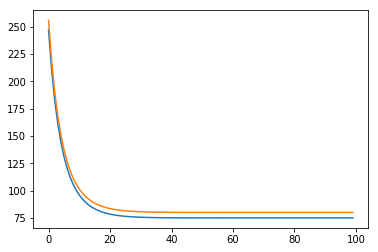

In [14]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from numpy import *
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
import numpy as np
import matplotlib.pyplot as plt
mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("C:\\Users\\555\\Desktop\\22.txt")
    return data[0], data[1]

X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)
X_trainb=X_train.todense()
X_testb=X_test.todense()
w=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])

y=[1]*404
X_trainb=np.column_stack((X_trainb,y))
x=[1]*102
X_testb=np.column_stack((X_testb,x))

def computeCost(w,X_trainb,y_train):
    
    totalerror=0
    
    for i in range(0,len(X_trainb)):
        x=X_trainb[i,:]
        y=y_train[i]
        totalerror+=1/2*(y_train[i]-X_trainb[i,:]*np.transpose(w))**2
   
    #print(totalerror)
    return totalerror
def optimizer(X_trainb,y_train,w_start,learning_rate,num_iter):
    w=w_start
    y=[j for j in range(100)]
    yy=[j for j in range(100)]
    for i in range(num_iter):
        w=compute_gradient(w,X_trainb,y_train,learning_rate)
        y[i]=computeCost(w,X_trainb,y_train)
        yy[i]=computeCost(w,X_testb,y_test)
        y[i]=y[i][0,0]/len(X_trainb)
        yy[i]=yy[i][0,0]/len(X_testb)
        
    return y,yy
    

def compute_gradient(w_current,X_trainb,y_train ,learning_rate):
    
    w_grad=0
    n=float(len(X_trainb))
    for i in range(0,len(X_trainb)):
        x=X_trainb[i,:]
        y=y_train[i]
        w_grad+=-y*x+(x*x.transpose())*w_current
    new_w=w_current-(learning_rate*w_grad)
    return new_w
    

def linear_regression():
    learning_rate=0.00005
    w=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    b=0
    num_iter=100
    L_train,L_validation = optimizer(X_trainb,y_train,w,learning_rate,num_iter)
   
      
   # plt.plot(range(len(y_pred)),y_pred,label="predict")  
    #plt.plot(range(len(y_pred)),y_test,label="test")  
    #plt.show() 
    #X_pred=X_trainb*np.transpose(w)
    #plt.plot(range(len(X_pred)),X_pred,label="predict")  
    #plt.plot(range(len(X_pred)),y_train,label="test")  
    #plt.show() 
    
    #print(L_train)
    #print(L_validation)
    xx=[i for i in range(100)]
    plt.plot(xx,L_train)   #蓝色线是L_train
    plt.plot(xx,L_validation) #橙色线是L_validation
    plt.show()
    
    
   

if __name__ =='__main__':

    linear_regression()